### 어느 advertising 품목이 sales에 영향을 미치는지에 대한 분석 및 sales 예측

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
folder = 'C:/Users/su/OneDrive - 청주대학교 (1)/datasets/before/2023'
file_name = '[2023_08_09]Advertising_dataset'
advertising_data = 'advertising.csv'

In [3]:
encoding='utf-8'
advertising_data = pd.read_csv(os.path.join(folder, file_name, advertising_data), encoding=encoding)

In [5]:
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
advertising_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


##### sales와 advertising 품목 들간의 관계

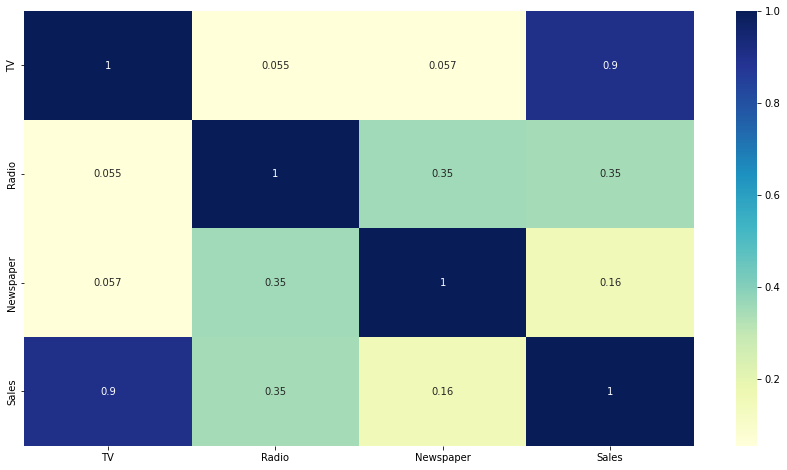

In [7]:
plt.figure(figsize=(15, 8))
sns.heatmap(advertising_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

- sales column과 높은 유사도를 가진 advertising 품목은 radio, tv임을 확인 newspaper는 저조한 성적을 거둠.
- 이를 그래프로 나타내보면 아래와 같이 볼 수 있음

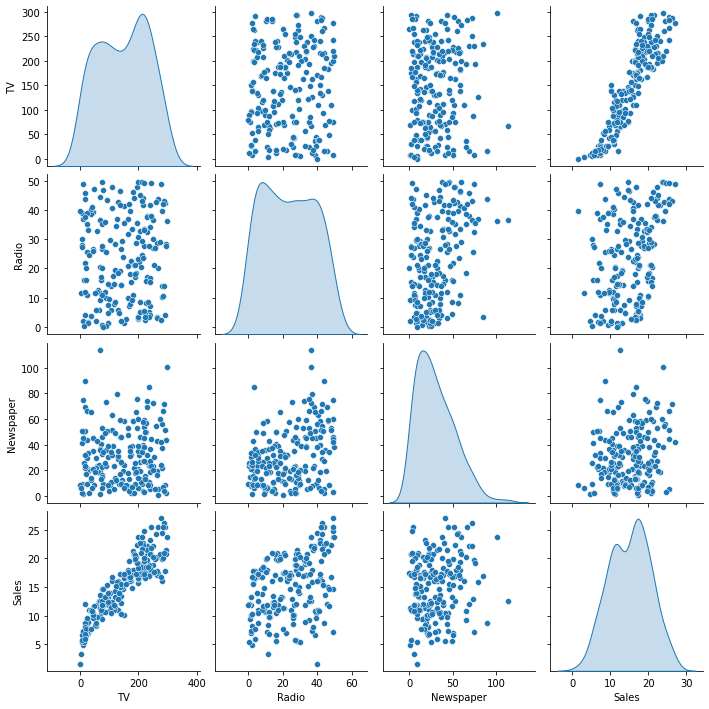

In [93]:
sns.pairplot(advertising_data, diag_kind='kde')

- sales는 TV와 양의 상관관계를, radio와도 양의 상관관계를 조금 보여주지만, newspaper와는 관계성이 모호한 모습을 보여줌

- p-value, coef, r-squared 등 매체와 sales간의 관계 분석

In [34]:
import statsmodels.formula.api as sm

model1 = sm.ols(formula='Sales ~ TV + Radio + Newspaper', data=advertising_data).fit()
model2 = sm.ols(formula='Sales ~ TV + Radio', data=advertising_data).fit()
model3 = sm.ols(formula='Sales ~ TV', data=advertising_data).fit()
print('TV, Radio, Newspaper')
print(model1.summary())
print('TV, Radio')
print(model2.summary())
print('TV')
print(model3.summary())

TV, Radio, Newspaper
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           8.13e-99
Time:                        04:44:47   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.30

- R-squared : 1에 가까울수록 선형적.(모델이 데이터를 잘 설명해주는 상태) TV만 변수로 넣었을때 : 0.812, 그 외에 : 0.903
- p>|t| : 유의확률, p-value, 0.05보다 작으면 독립 변수가 종속 변수에 영향을 미치는 것이 유의미함. Newspaper만 0.954
- Durbin-Watson(더 빈 왓슨, DW검정) : residual 독립성 확인. (residual = 표본(sample)으로 추정한 회귀식과 실제 관측값의 차이)
    - 0이면 residual이 양의 상관관계를 가짐
    - 2이면 자기 상관이 없는 독립성을 가짐
    - 4이면 residual이 음의 상관관계를 가짐
- coef : 계수. sales에 미치는 영향의 정도. TV보다 Radio가 더 높은 영향력을 지님을 확인할 수 있다. 유사도와는 다른 결과를 보여줌.

- 결과
    - newspaper는 sales와 관계가 매우 적음. 예측 및 분석에서 제외.
    - radio가 tv보다 sales에 더 높은 영향력을 미침.

#### 선형 회귀 분석
- 데이터의 분포가 선형이 아닌 곡선을 이루고 있으므로, 다항 회귀(polynomialfeatures 함수 사용)

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

- 선형 회귀 분석을 위한 데이터 분리
- 위의 newspaper를 제외한 데이터 예측이 더 나은 결과를 보이는지 비교

In [86]:
# newspaper 포함
# x_train, y_train
x = advertising_data.drop('Sales', axis=1)
y = advertising_data.Sales

In [44]:
ploynomialConvertor = PolynomialFeatures(degree=2 , include_bias=False)
polyFeatures = ploynomialConvertor.fit_transform(x)
polyFeatures.shape

(200, 9)

- 데이터 분리

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    polyFeatures,
    y,
    test_size=0.3,
    random_state=101
    )

- 데이터 학습 및 예측

In [66]:
linear_model = LinearRegression()
decision_model = DecisionTreeRegressor(random_state=24)

linear_model.fit(X_train , y_train)
decision_model.fit(X_train , y_train)

DecisionTreeRegressor()

In [67]:
linear_y_pred = linear_model.predict(X_test)
decision_y_pred = decision_model.predict(X_test)

- LinearRegression model

In [68]:
# 예측 결과
pd.DataFrame({'Y_Test':y_test , 'y_pred':linear_y_pred , 'Residuals':(linear_y_pred-y_test) }).head()

,Y_Test,y_pred,Residuals
37,14.7,13.741787,-0.958213
109,19.8,21.114650,1.314650
31,11.9,13.032879,1.132879
89,16.7,16.329718,-0.370282
66,11.0,7.804774,-3.195226


In [70]:
MAE= metrics.mean_absolute_error(linear_y_pred , y_test)
MSE=metrics.mean_squared_error(linear_y_pred, y_test)
RMSE=np.sqrt(MSE)
pd.DataFrame([MAE , MSE , RMSE], index=['MAE', 'MSE', 'RMSE'] , columns=['Metrics'])

,Metrics
MAE,1.154803
MSE,2.130384
RMSE,1.459583


- DecisionTreeRegressor model

In [69]:
# 예측 결과
pd.DataFrame({'Y_Test':y_test , 'y_pred':decision_y_pred , 'Residuals':(decision_y_pred-y_test) }).head()

,Y_Test,y_pred,Residuals
37,14.7,13.6,-1.1
109,19.8,18.4,-1.4
31,11.9,12.4,0.5
89,16.7,15.0,-1.7
66,11.0,8.0,-3.0


In [71]:
MAE= metrics.mean_absolute_error(decision_y_pred , y_test)
MSE=metrics.mean_squared_error(decision_y_pred, y_test)
RMSE=np.sqrt(MSE)
pd.DataFrame([MAE , MSE , RMSE], index=['MAE', 'MSE', 'RMSE'] , columns=['Metrics'])

,Metrics
MAE,0.971667
MSE,1.842167
RMSE,1.357264


- DecisionTreeRegressor 모델이 LinearRegression 모델보다 MSE값이 작아 더 높은 성능을 보임.

- 위의 가설대로 newspaper를 제외하고 sales 데이터 예측

In [94]:
# x에서 newspaper column drop
x_no_news = x.drop('Newspaper', axis=1)
ploynomialConvertor = PolynomialFeatures(degree=2 , include_bias=False)
polyFeatures_temp = ploynomialConvertor.fit_transform(x_no_news)
polyFeatures_temp.shape

(200, 5)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    polyFeatures_temp,
    y,
    test_size=0.3,
    random_state=101
    )

In [89]:
decision_model = DecisionTreeRegressor(random_state=24)
decision_model.fit(X_train , y_train)

DecisionTreeRegressor(random_state=24)

In [90]:
decision_y_pred = decision_model.predict(X_test)

In [91]:
# 예측 결과
pd.DataFrame({'Y_Test':y_test , 'y_pred':decision_y_pred , 'Residuals':(decision_y_pred-y_test) }).head()

,Y_Test,y_pred,Residuals
37,14.7,14.6,-0.1
109,19.8,18.9,-0.9
31,11.9,12.9,1.0
89,16.7,16.0,-0.7
66,11.0,8.8,-2.2


In [92]:
MAE= metrics.mean_absolute_error(decision_y_pred , y_test)
MSE=metrics.mean_squared_error(decision_y_pred, y_test)
RMSE=np.sqrt(MSE)
pd.DataFrame([MAE , MSE , RMSE], index=['MAE', 'MSE', 'RMSE'] , columns=['Metrics'])

,Metrics
MAE,0.788333
MSE,1.441833
RMSE,1.200764


- 결과
    - newspaper가 있을 때 : 1.842167
    - newspaper가 없을 때 : 1.441833  
- newspaper가 없을 때가 더 높은 예측결과를 보여줌.(더 적은 MSE값을 보여줌)